In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [42]:
# STEP 1: Upload & Load Dataset
uploaded = files.upload()   # Upload your "Match_Winner.csv"
df = pd.read_csv("Match_Winner.csv")

print("Original Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Saving Match_Winner.csv to Match_Winner (2).csv
Original Shape: (9380, 22)

First 5 rows:
     Season   MatchDate  HomeTeam       AwayTeam  FullTimeHomeGoals  \
0  2000/01  2000-08-19  Charlton       Man City                  4   
1  2000/01  2000-08-19   Chelsea       West Ham                  4   
2  2000/01  2000-08-19  Coventry  Middlesbrough                  1   
3  2000/01  2000-08-19     Derby    Southampton                  2   
4  2000/01  2000-08-19     Leeds        Everton                  2   

   FullTimeAwayGoals FullTimeResult  HalfTimeHomeGoals  HalfTimeAwayGoals  \
0                  0              H                  2                  0   
1                  2              H                  1                  0   
2                  3              A                  1                  1   
3                  2              D                  1                  2   
4                  0              H                  2                  0   

  HalfTimeResult  ...  Ho

In [33]:
# STEP 2: Remove unwanted columns
df_cleaned = df.drop(columns=["MatchDate"], errors="ignore")

In [34]:
# STEP 3: Handle Null Values
print("\nNull values before:\n", df_cleaned.isnull().sum())
df_cleaned = df_cleaned.dropna()
print("Shape after dropping nulls:", df_cleaned.shape)


Null values before:
 Season               0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64
Shape after dropping nulls: (9380, 21)


In [35]:
# STEP 4: Remove Duplicate Rows
print("\nDuplicates before:", df_cleaned.duplicated().sum())
df_cleaned = df_cleaned.drop_duplicates()
print("Shape after removing duplicates:", df_cleaned.shape)


Duplicates before: 0
Shape after removing duplicates: (9380, 21)


In [36]:
# STEP 5: Detect categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object','category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['Season', 'HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeResult']


In [37]:
# STEP 6: Label Encoding
df_label_encoded = df_cleaned.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le

print("\nLabel Encoded Data (first 5 rows):\n", df_label_encoded.head())



Label Encoded Data (first 5 rows):
    Season  HomeTeam  AwayTeam  FullTimeHomeGoals  FullTimeAwayGoals  \
0       0        12        26                  4                  0   
1       0        13        43                  4                  2   
2       0        14        28                  1                  3   
3       0        16        36                  2                  2   
4       0        22        17                  2                  0   

   FullTimeResult  HalfTimeHomeGoals  HalfTimeAwayGoals  HalfTimeResult  \
0               2                  2                  0               2   
1               2                  1                  0               2   
2               0                  1                  1               1   
3               1                  1                  2               0   
4               2                  2                  0               2   

   HomeShots  ...  HomeShotsOnTarget  AwayShotsOnTarget  HomeCorners  \
0         17 

In [38]:
# STEP 7: One Hot Encoding
df_onehot_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)
print("\nOne Hot Encoded Data (first 5 rows):\n", df_onehot_encoded.head())


One Hot Encoded Data (first 5 rows):
    FullTimeHomeGoals  FullTimeAwayGoals  HalfTimeHomeGoals  HalfTimeAwayGoals  \
0                  4                  0                  2                  0   
1                  4                  2                  1                  0   
2                  1                  3                  1                  1   
3                  2                  2                  1                  2   
4                  2                  0                  2                  0   

   HomeShots  AwayShots  HomeShotsOnTarget  AwayShotsOnTarget  HomeCorners  \
0         17          8                 14                  4            6   
1         17         12                 10                  5            7   
2          6         16                  3                  9            8   
3          6         13                  4                  6            5   
4         17         12                  8                  6            6   

   Aw

In [41]:
df_cleaned.to_csv("Match_Winner_Cleaned.csv", index=False)
df_label_encoded.to_csv("Match_Winner_LabelEncoded.csv", index=False)
df_onehot_encoded.to_csv("Match_Winner_OneHotEncoded.csv", index=False)

# Download all three files
files.download("Match_Winner_Cleaned.csv")
files.download("Match_Winner_LabelEncoded.csv")
files.download("Match_Winner_OneHotEncoded.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# STEP 8: Compare Results
print("\nOriginal Shape:", df_cleaned.shape)
print("Label Encoded Shape:", df_label_encoded.shape)
print("One Hot Encoded Shape:", df_onehot_encoded.shape)


Original Shape: (9380, 21)
Label Encoded Shape: (9380, 21)
One Hot Encoded Shape: (9380, 139)


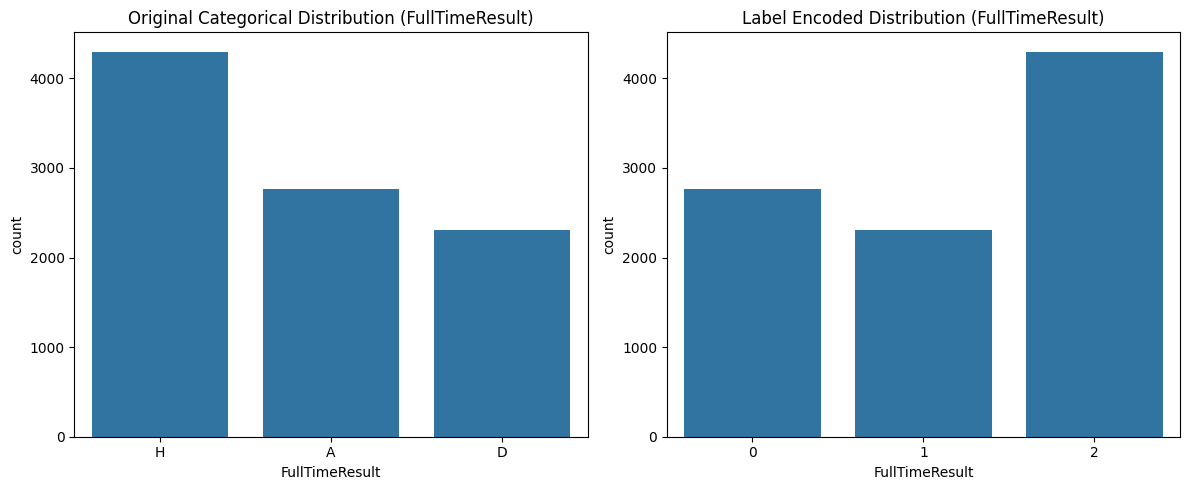

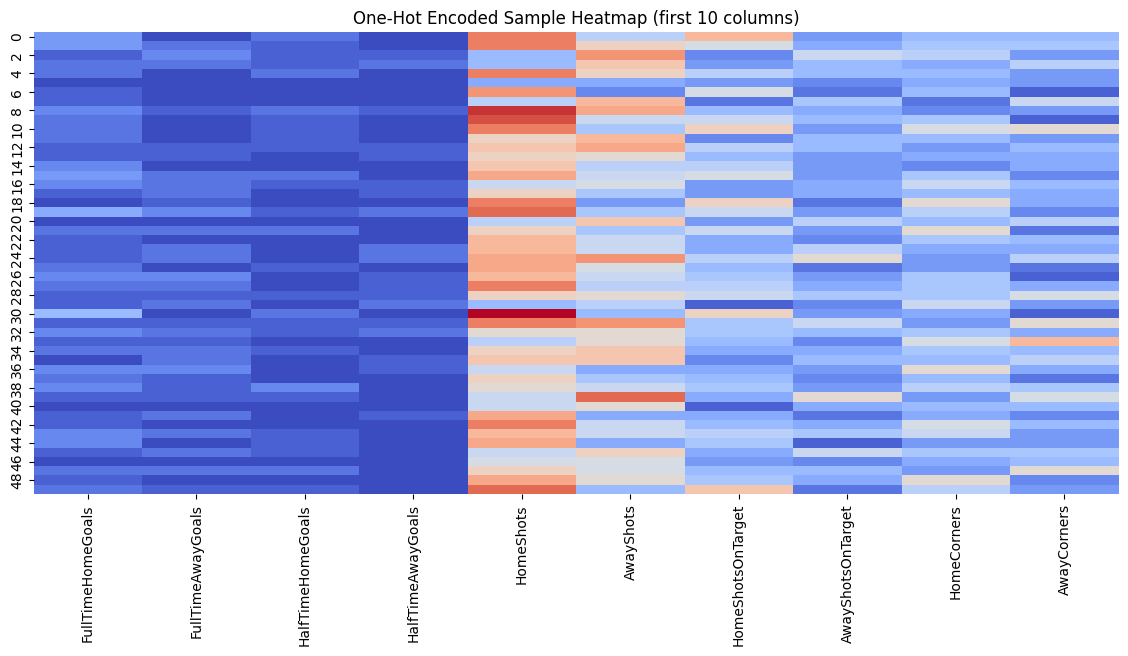

In [40]:
# STEP 9: Visualization
plt.figure(figsize=(12,5))

# Plot category counts before encoding
plt.subplot(1,2,1)
sns.countplot(x=df_cleaned['FullTimeResult'])
plt.title("Original Categorical Distribution (FullTimeResult)")

# Plot label encoded distribution
plt.subplot(1,2,2)
sns.countplot(x=df_label_encoded['FullTimeResult'])
plt.title("Label Encoded Distribution (FullTimeResult)")

plt.tight_layout()
plt.show()

# One-hot encoded columns heatmap (only first 50 rows to visualize)
plt.figure(figsize=(14,6))
sns.heatmap(df_onehot_encoded.iloc[:50, :10], cmap="coolwarm", cbar=False)
plt.title("One-Hot Encoded Sample Heatmap (first 10 columns)")
plt.show()